In [2]:
import pandas as pd
import os
from scipy.io import wavfile
from tqdm import tqdm
import random


Prepare required data from AudioSet 500+ classes

In [3]:

# Define file paths
train_csv_path = 'AudioSet/train.csv'
train_missed_csv_path = 'AudioSet/train_missed.csv'
class_label_indices_csv_path = 'AudioSet/class_labels_indices.csv'
train_wav_folder_path = 'AudioSet/train_wav/'

# Load train.csv
train_df = pd.read_csv(train_csv_path)

# Load train_missed.csv
train_missed_df = pd.read_csv(train_missed_csv_path)

# Concatenate train and train_missed
full_train_df = pd.concat([train_df, train_missed_df])

# Load class_label_indices.csv
class_labels_df = pd.read_csv(class_label_indices_csv_path)

# Filter class labels
desired_classes = ['Silence', 'Male speech, man speaking', 'Female speech, woman speaking', 
                   'Vacuum cleaner', 'Computer keyboard', 'Clicking', 'Sneeze', 
                   'Cough', 'Laughter', 'Hair dryer']

filtered_labels = class_labels_df[class_labels_df['display_name'].isin(desired_classes)]

# Convert class labels to dictionary for quick lookup
label_to_mid = dict(zip(filtered_labels['display_name'], filtered_labels['mid']))

# Filter rows in train data based on desired labels
filtered_train_df = full_train_df[full_train_df['positive_labels'].apply(lambda x: any(label in label_to_mid.values() for label in x.split(',')))]

# Convert start and end seconds to float
filtered_train_df.loc[:, 'start_seconds'] = filtered_train_df['start_seconds'].astype(float)
filtered_train_df.loc[:, 'end_seconds'] = filtered_train_df['end_seconds'].astype(float)

# Initialize list to store balanced data
balanced_data = []

# Define the maximum number of samples to keep from the majority class
max_samples = 80

# Iterate over filtered_train_df with progress tracking
for class_name, group in tqdm(filtered_train_df.groupby('positive_labels'), desc="Balancing Classes"):
    # If the class is "Speech" and the number of samples is greater than max_samples, sample max_samples randomly
    if '/m/09x0r' in class_name and len(group) > max_samples:
        group = group.sample(n=max_samples, random_state=42)
    
    # Append balanced data to list
    balanced_data.extend(group.to_dict(orient='records'))

# Create DataFrame from balanced data
balanced_df = pd.DataFrame(balanced_data)

# Display the class distribution after balancing
class_distribution_balanced = balanced_df['positive_labels'].value_counts()
print("Class distribution after balancing:\n", class_distribution_balanced)

# Initialize list to store data
data = []

# Iterate over filtered_train_df with progress tracking
for index, row in tqdm(balanced_df.iterrows(), total=len(balanced_df), desc="Processing WAV files"):
    # Extract YTID, start_seconds, end_seconds, positive_labels
    YTID, start_seconds, end_seconds, positive_labels = row['YTID'], row['start_seconds'], row['end_seconds'], row['positive_labels']
    
    # Load WAV file
    wav_file_path = os.path.join(train_wav_folder_path, YTID + '.wav')
    try:
        sample_rate, audio_data = wavfile.read(wav_file_path)
        
        # Get first class name from positive_labels that belongs to desired classes
        class_names = [class_labels_df[class_labels_df['mid'] == label]['display_name'].values[0] for label in positive_labels.split(',') if label in label_to_mid.values()]
        
        # Append data to list
        data.append({
            'wav_file': wav_file_path,
            'class_name': class_names[0] if class_names else None  # If no class found, set to None
        })
    except FileNotFoundError:
        print(f"File not found: {wav_file_path}. Skipping...")

# Create DataFrame from data
wav_dataset_df = pd.DataFrame(data)


Balancing Classes: 100%|██████████| 243/243 [00:00<00:00, 2076.96it/s]


Class distribution after balancing:
 positive_labels
/m/03wvsk                                                   60
/m/0d31p                                                    59
/m/07qc9xj,/m/09x0r                                         28
/m/01m2v,/m/0316dw                                          22
/m/02zsn,/m/09x0r                                           19
                                                            ..
/m/01j3sz,/m/07r660_,/m/07sq110,/m/09x0r                     1
/m/01j3sz,/m/07r660_,/m/09x0r                                1
/m/01j3sz,/m/07r660_,/m/09x0r,/t/dd00125                     1
/m/01j3sz,/m/07rgt08,/m/09x0r,/t/dd00125                     1
/m/01280g,/m/04cvmfc,/m/05zppz,/m/09x0r,/m/0cdnk,/m/0jbk     1
Name: count, Length: 243, dtype: int64


Processing WAV files:  13%|█▎        | 82/636 [00:00<00:00, 803.69it/s]

File not found: AudioSet/train_wav/xHqgVaGI21g.wav. Skipping...
File not found: AudioSet/train_wav/nfdEAfLG7qQ.wav. Skipping...
File not found: AudioSet/train_wav/EBwiCVS_gBs.wav. Skipping...
File not found: AudioSet/train_wav/ZK0nR3j1pAY.wav. Skipping...
File not found: AudioSet/train_wav/MoXvWqQ2v38.wav. Skipping...
File not found: AudioSet/train_wav/8N5XxcJ7QOU.wav. Skipping...
File not found: AudioSet/train_wav/58jMS3K5iMo.wav. Skipping...
File not found: AudioSet/train_wav/VdaTqi6O4d0.wav. Skipping...
File not found: AudioSet/train_wav/1jc3YPwYfC4.wav. Skipping...
File not found: AudioSet/train_wav/fDlIO__7vv0.wav. Skipping...
File not found: AudioSet/train_wav/qW5-hZGGx9U.wav. Skipping...
File not found: AudioSet/train_wav/b24uboHG_GE.wav. Skipping...
File not found: AudioSet/train_wav/EX0ZF-jNWIg.wav. Skipping...
File not found: AudioSet/train_wav/lvtn_PxRQm4.wav. Skipping...
File not found: AudioSet/train_wav/SQei2xJFNpk.wav. Skipping...
File not found: AudioSet/train_wav/7bdrH

Processing WAV files:  46%|████▌     | 290/636 [00:00<00:00, 891.90it/s]

File not found: AudioSet/train_wav/KpGO2VTksIw.wav. Skipping...
File not found: AudioSet/train_wav/8LCbldfHczs.wav. Skipping...
File not found: AudioSet/train_wav/Vv5m1uKBxY8.wav. Skipping...
File not found: AudioSet/train_wav/tqMZ7xMB5AU.wav. Skipping...
File not found: AudioSet/train_wav/Vxr8_SaNWHI.wav. Skipping...
File not found: AudioSet/train_wav/rMhqJfcNa3I.wav. Skipping...
File not found: AudioSet/train_wav/8Mv69rlDCbU.wav. Skipping...
File not found: AudioSet/train_wav/HPc4sPSx07k.wav. Skipping...
File not found: AudioSet/train_wav/s1Z5w3OIaXQ.wav. Skipping...
File not found: AudioSet/train_wav/iRbyI39B-kQ.wav. Skipping...
File not found: AudioSet/train_wav/1p6h5X_LN_A.wav. Skipping...
File not found: AudioSet/train_wav/X7UGw9kkFwQ.wav. Skipping...
File not found: AudioSet/train_wav/3O7W7MH5HhY.wav. Skipping...
File not found: AudioSet/train_wav/HZVKl0q1WI4.wav. Skipping...
File not found: AudioSet/train_wav/61awfpVe49k.wav. Skipping...
File not found: AudioSet/train_wav/RjPEr

Processing WAV files:  73%|███████▎  | 466/636 [00:00<00:00, 805.44it/s]

File not found: AudioSet/train_wav/vmAsxFQbEg4.wav. Skipping...
File not found: AudioSet/train_wav/HoVrv3_xhS8.wav. Skipping...
File not found: AudioSet/train_wav/hII5lOqV22s.wav. Skipping...
File not found: AudioSet/train_wav/xFwd1UDEHMQ.wav. Skipping...
File not found: AudioSet/train_wav/LOdVDIv1snY.wav. Skipping...
File not found: AudioSet/train_wav/zuW75_LUwCE.wav. Skipping...
File not found: AudioSet/train_wav/H4QU67Ss9WY.wav. Skipping...
File not found: AudioSet/train_wav/ddsEVCK5qZw.wav. Skipping...
File not found: AudioSet/train_wav/-JfXNXGi-l8.wav. Skipping...
File not found: AudioSet/train_wav/3SWi2UgEwY8.wav. Skipping...
File not found: AudioSet/train_wav/9WAK0ufttVQ.wav. Skipping...
File not found: AudioSet/train_wav/JGjjYIjvNwE.wav. Skipping...
File not found: AudioSet/train_wav/SH4csdrlum0.wav. Skipping...
File not found: AudioSet/train_wav/ZIT1maeaOPI.wav. Skipping...
File not found: AudioSet/train_wav/uthV5xApuWQ.wav. Skipping...
File not found: AudioSet/train_wav/ESw7b

Processing WAV files: 100%|██████████| 636/636 [00:00<00:00, 839.10it/s]

File not found: AudioSet/train_wav/CwOooX2g7nk.wav. Skipping...
File not found: AudioSet/train_wav/JySp6TNxk0w.wav. Skipping...
File not found: AudioSet/train_wav/kE4rIrBxe48.wav. Skipping...
File not found: AudioSet/train_wav/rNhhTxnWY7c.wav. Skipping...
File not found: AudioSet/train_wav/1LHxY6b9JAU.wav. Skipping...
File not found: AudioSet/train_wav/A5orLtocLMA.wav. Skipping...
File not found: AudioSet/train_wav/BTZiBsqBMWo.wav. Skipping...
File not found: AudioSet/train_wav/Ma_myoeBN1c.wav. Skipping...
File not found: AudioSet/train_wav/_vpfycBBX2I.wav. Skipping...
File not found: AudioSet/train_wav/cR2zUNzOev8.wav. Skipping...
File not found: AudioSet/train_wav/zoK3H42HCu8.wav. Skipping...


In [4]:
wav_dataset_df

,wav_file,class_name
0,AudioSet/train_wav/deblSm0P08g.wav,Laughter
1,AudioSet/train_wav/drVo5VQfsDc.wav,"Male speech, man speaking"
2,AudioSet/train_wav/R7xk7Dyruq4.wav,Laughter
3,AudioSet/train_wav/TZ8vo-GTOa0.wav,"Female speech, woman speaking"
4,AudioSet/train_wav/V5HMIxuAtv8.wav,"Male speech, man speaking"
...,...,...
535,AudioSet/train_wav/uCUPXiawrJc.wav,Vacuum cleaner
536,AudioSet/train_wav/v5oorz0sCeE.wav,Vacuum cleaner
537,AudioSet/train_wav/v5x0zXCuJJc.wav,Vacuum cleaner
538,AudioSet/train_wav/w65m7AVSpYw.wav,Vacuum cleaner


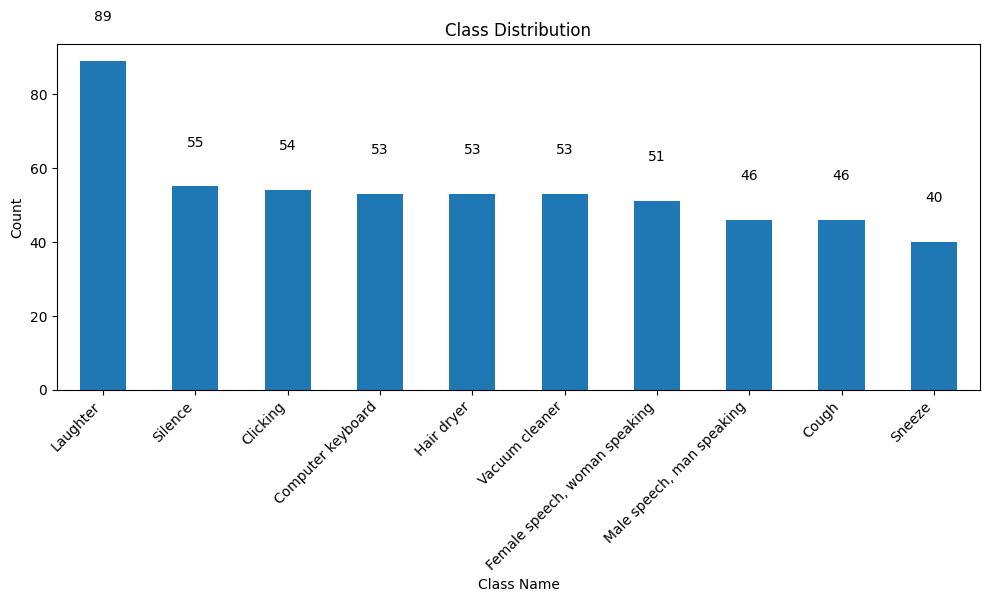

In [5]:
import matplotlib.pyplot as plt

# Group by class_name and count occurrences
class_distribution = wav_dataset_df['class_name'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
ax = class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add count annotations to each bar
for i, count in enumerate(class_distribution):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


Save Preprocessed Data

In [6]:
from pydub import AudioSegment
import os

# Define function for preprocessing audio
def preprocess_audio(audio_path, output_path, target_sample_rate=16000):
    # Load audio file
    audio = AudioSegment.from_wav(audio_path)
    
    # Resample audio to target sample rate
    audio = audio.set_frame_rate(target_sample_rate)
    
    # Export preprocessed audio to output path
    audio.export(output_path, format="wav")

# Define input folder containing the original audio files
input_folder = 'AudioSet/train_wav'

# Define output folder for preprocessed audio files
output_folder = 'AudioSet/preprocessed_train_wav'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Iterate over each row in the DataFrame
for index, row in wav_dataset_df.iterrows():
    # Get the audio file path and class name
    audio_path = row['wav_file']
    class_name = row['class_name']
    
    # Define output file path for preprocessed audio
    output_file_path = os.path.join(output_folder, f"{class_name}_{index}.wav")
    
    # Preprocess the audio and save the preprocessed version
    preprocess_audio(audio_path, output_file_path)
